# ECSE415 - Intro to Computer Vision
## Tutorial 4 - Feature Detection in OpenCV

## Histograms
- Image histograms refers to a histogram of the pixel intensity values of an image.
- A graph showing the number of pixels in an image at each different intensity value.
- For 8-bit grayscale there are 256 different possible intensities, thus the histogram will display the distribution of pixels amongst these values.
- Histograms of RGB images can be shown as either individual histograms of red, green and blue channels.
- Or a 3-D histogram with the three axes representing red, blue and green.

Image pixel count = 150100
hist_gray pixel count = [150100.]
hist_color[R] pixel count = [150100.]
hist_color[G] pixel count = [150100.]
hist_color[B] pixel count = [150100.]


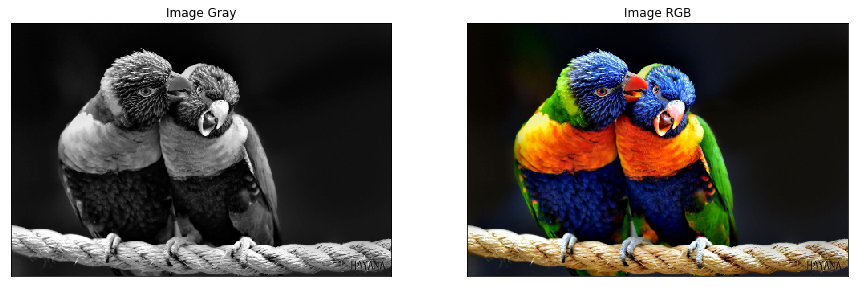

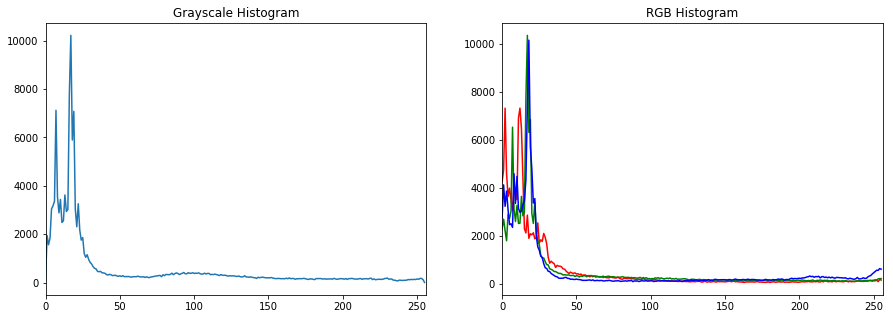

In [9]:
####################
# IMAGE HISTOGRAMS #
####################
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load the image
img = cv2.imread("bird.png")

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# compute histogram for grayscale image
# cv2.calcHist(image, channels, mask, histSize, ranges)
hist_gray = cv2.calcHist([img_gray], [0], None, [256], [0,256])

# compute histogram for each RGB channel

hist_color = []
for i in range(0, img.shape[2]):
    hist_color.append(cv2.calcHist([img], [i], None, [256], [0,256]))

print("Image pixel count = " + str(img.shape[0]*img.shape[1]))
print("hist_gray pixel count = " + str(sum(hist_gray)))
print("hist_color[R] pixel count = " + str(sum(hist_color[0])))
print("hist_color[G] pixel count = " + str(sum(hist_color[1])))
print("hist_color[B] pixel count = " + str(sum(hist_color[2])))
    
# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display image
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img_gray, cmap="gray")
plt.title("Image Gray"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img)
plt.title("Image RGB"), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(121), plt.plot(hist_gray)
plt.title("Grayscale Histogram"), plt.xlim([0, 256])
plt.subplot(122)
colors = ['r', 'g', 'b']
for i in range(0, img.shape[2]):
    plt.plot(hist_color[i], color=colors[i])
plt.title("RGB Histogram"), plt.xlim([0,256])
plt.show()



# plt.subplot(121), plt.imshow(img_gray, cmap="gray")
# plt.title("Image Gray"), plt.xticks([]), plt.yticks([])
# plt.subplot(122), 

# plt.plot(hist_gray)
# plt.title("Grayscale Histogram"), #plt.xlim([0, 256])
# plt.figure(figsize=(10,10))
# plt.subplot(121), plt.imshow(img)
# plt.title("Image RGB"), plt.xticks([]), plt.yticks([])
# plt.subplot(122)
# colors = ['r', 'g', 'b']
# for i in range(0, img.shape[2]):
#     plt.plot(hist_color[i], color=colors[i])
# plt.title("RGB Histogram"), #plt.xlim([0,256])
# plt.show()

## Template Matching
- A technique used in computer vision for finding a sub-image of a target image which matches a template image.
- Technique is used widely in object detection such as,
- Manufacturing (as a part of quality control),
- Robotics (a way to navigate)
- Medical imaging (finding abnormalities),
- Or as a way to detect edges in images.

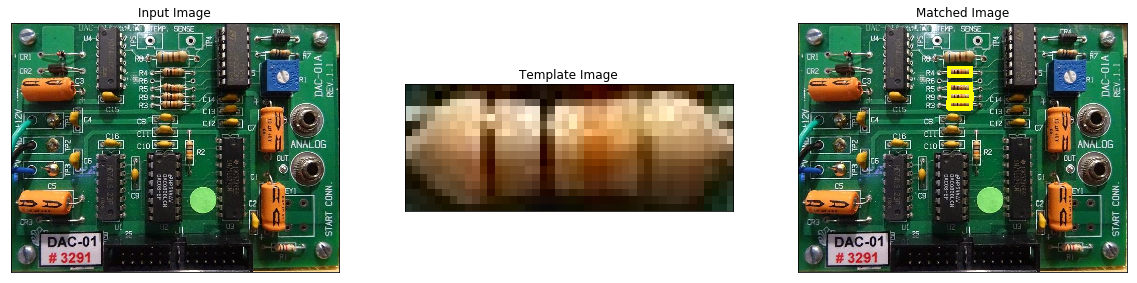

In [12]:
#####################
# TEMPLATE MATCHING #
#####################

# load image
img = cv2.imread("board.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# create copy
img_disp = img.copy()

# Read a template from one of the resistors
temp = cv2.imread("template.png")
temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)

ht, wt = temp.shape[0:2]

# apply template matching
# cv2.matchTemplate(image, templ, method) → result
res = cv2.matchTemplate(img, temp, cv2.TM_CCOEFF_NORMED)

# set a threshold
thres = 0.8
# find all points above threshold
loc = np.where(res >= thres)
# loop though the points
for pt in zip(*loc[::-1]):
    # cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) → None
    cv2.rectangle(img_disp, pt, (pt[0]+wt, pt[1]+ht), (255,255,0), 5)

# display images
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(temp)
plt.title("Template Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_disp)
plt.title("Matched Image"), plt.xticks([]), plt.yticks([])
plt.show()

## Detour on Zip

In [8]:
#######
# ZIP #
#######
x=[1,2,3,7]
y=[4,5,6,9]
for pt in zip(x,y):
    print(pt)

(1, 4)
(2, 5)
(3, 6)
(7, 9)


## Feature Detection and Description

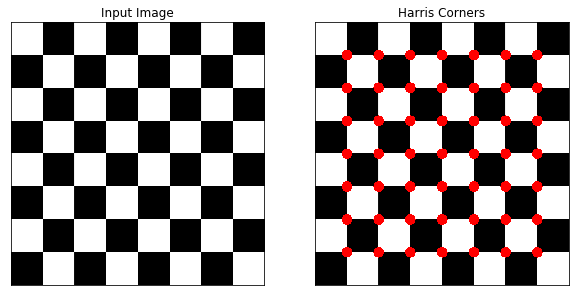

In [8]:
##########################
# HARRIS CORNER DETECTOR #
##########################

# load image as grayscale
img = cv2.imread("chessboard.png")
# copy image
img_disp = img.copy()
# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# detect harris corners
# cv2.cornerHarris(src, neighborhoodsize, sobelKernelSize, Harris_k)
corners = cv2.cornerHarris(img_gray, 2, 3, 0.04)
# normalize corner map [0,1]
cv2.normalize(corners, corners, 0, 1, cv2.NORM_MINMAX)

# threshold for an optimal value
thres = 0.6
# list all points higher than threshold
loc = np.where(corners >= thres)
# loop though points
for pt in zip(*loc[::-1]):
    # draw filled circle on each point
    # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) → None
    cv2.circle(img_disp, pt, 15, (255,0,0), -1)

# display images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("Harris Corners"), plt.xticks([]), plt.yticks([])
plt.show()